# Knowledge Embedding with Pykeen
For optimized parameter, please refer to [this github page](https://github.com/pykeen/benchmarking).


## modules

In [1]:
from pykeen.pipeline import pipeline
from pykeen.datasets import get_dataset
import pandas as pd
import numpy as np
import os

/home/acg16558pn/kg_20240423/lib/python3.10/site-packages/pykeen/evaluation/evaluator.py:16: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## functions

In [2]:
def convert_dtype(value):
    if isinstance(value, np.floating):
        return float(value)
    elif isinstance(value, np.integer):
        return int(value)
    else:
        return value

## main

In [3]:
f_params = '../benchmarking/df_best_param.pkl'
df_best_params_org = pd.read_pickle(f_params).reset_index()

In [4]:
df_best_params = df_best_params_org[df_best_params_org['model'].isin(['transe'])]

In [5]:
df_best_params = df_best_params[df_best_params['dataset'].isin(['fb15k237'])]

In [33]:
df_best_params 

,index,dataset,evaluator,loss,metric,model,optimizer,pykeen_git_hash,pykeen_version,regularizer,...,pipeline_config.pipeline.model_kwargs.embedding_height,pipeline_config.pipeline.model_kwargs.embedding_width,pipeline_config.pipeline.model_kwargs.input_channels,pipeline_config.pipeline.model_kwargs.kernel_height,pipeline_config.pipeline.model_kwargs.kernel_width,hpo.pipeline.model_kwargs.input_channels,hpo.pipeline.model_kwargs.embedding_height,hpo.pipeline.model_kwargs.embedding_width,hpo.pipeline.model_kwargs.kernel_height,hpo.pipeline.model_kwargs.kernel_width
0,0,fb15k237,rankbased,crossentropy,hits@10,transe,adam,ec6b0751,0.1.2-dev,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_best_params.filter(regex='hpo.pipeline.stopper').T

,0
hpo.pipeline.stopper,early
hpo.pipeline.stopper_kwargs.frequency,50
hpo.pipeline.stopper_kwargs.patience,2
hpo.pipeline.stopper_kwargs.delta,0.002


In [36]:
list_args = []
for idx in df_best_params.index:
    dict_args = {}
    
    dict_args['dataset'] = df_best_params.loc[idx,'dataset']
    
    dict_args['dataset_kwargs'] = {}
    for k, v in df_best_params.filter(regex='pipeline_config.pipeline.dataset_kwargs').loc[idx].items():
        if not np.isnan(v):
            dict_args['dataset_kwargs'][k.split('.')[-1]] = v

    dict_args['evaluator'] = df_best_params.loc[idx,'evaluator']

    dict_args['evaluator_kwargs'] = {}
    for k, v in df_best_params.filter(regex='pipeline_config.pipeline.evaluator_kwargs').loc[idx].items():
        if not np.isnan(v):
            dict_args['evaluator_kwargs'][k.split('.')[-1]] = v
    
    dict_args['model'] = df_best_params.loc[idx,'model']

    dict_args['loss'] = df_best_params.loc[idx, 'loss']

    dict_args['regularizer'] = df_best_params.loc[idx, 'regularizer']

    dict_args['optimizer'] = df_best_params.loc[idx, 'optimizer']

    dict_args['optimizer_kwargs'] = {}
    for k, v in df_best_params.filter(regex='pipeline_config.pipeline.optimizer_kwargs').loc[idx].items():
        if not np.isnan(v) and 'automatic_memory_optimization' not in k:
            dict_args['optimizer_kwargs'][k.split('.')[-1]] = convert_dtype(v)
    
    dict_args['model_kwargs'] = {}
    for k, v in df_best_params.filter(regex='pipeline_config.pipeline.model_kwargs').loc[idx].items():
        if not np.isnan(v) and 'automatic_memory_optimization' not in k:
            k = k.split('.')[-1]
            if k in ['output_channels', 'kernel_height', 'kernel_width']:
                v = int(v)    
            dict_args['model_kwargs'][k] = convert_dtype(v)

    dict_args['training_loop'] = df_best_params.loc[idx, 'training_loop']

    dict_args['training_kwargs'] = {}
    for k, v in df_best_params.filter(regex='pipeline_config.pipeline.training_kwargs').loc[idx].items():
        if not np.isnan(v):
            k = k.split('.')[-1]
            if k in ['batch_size', 'num_epochs']:
                v = int(v)

            if k not in ['label_smoothing']:
                dict_args['training_kwargs'][k.split('.')[-1]] = v

            #dict_args['training_kwargs'][k.split('.')[-1]] = v


    list_args.append(dict_args)

INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///home/acg16558pn/.data/pykeen/datasets/fb15k237/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///home/acg16558pn/.data/pykeen/datasets/fb15k237/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///home/acg16558pn/.data/pykeen/datasets/fb15k237/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.triples.triples_factory:Loading from file:///home/acg16558pn/.data/pykeen/datasets/fb15k237/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/validation
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /home/acg16558pn/.data/pykeen/checkpoints/best-model-weights-6f375b66-4f51-497a-aba2-6e89f0662fd8.pt
INFO:pykeen.triples.triples_factory:Creating inverse triples.


MODEL	transe
DATASET	fb15k237


Training epochs on cuda:0:   0%|          | 0/201 [00:00<?, ?epoch/s]

INFO:pykeen.triples.triples_factory:Creating inverse triples.


Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.
INFO:pykeen.evaluation.evaluator:Evaluation took 1.97s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 50: 0.3252596142873445. Saved model weights to /home/acg16558pn/.data/pykeen/checkpoints/best-model-weights-6f375b66-4f51-497a-aba2-6e89f0662fd8.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 50.


Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.81s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 100: 0.3260584274791738. Saved model weights to /home/acg16558pn/.data/pykeen/checkpoints/best-model-weights-6f375b66-4f51-497a-aba2-6e89f0662fd8.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 100.


Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.82s seconds


Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.82s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 200: 0.32993837726805886. Saved model weights to /home/acg16558pn/.data/pykeen/checkpoints/best-model-weights-6f375b66-4f51-497a-aba2-6e89f0662fd8.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 200.


Training batches on cuda:0:   0%|          | 0/2126 [00:00<?, ?batch/s]

Evaluating on cuda:0:   0%|          | 0.00/20.4k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 2.10s seconds


--------------------
RESULT	0.3365299931500147


INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=14505, num_relations=474, create_inverse_triples=True, num_triples=272115, path=Release/train.txt) to file:///home/acg16558pn/programs/Analysis-of-conventional-refinement-method-for-knowledge-graph/models/20240606/fb15k237_transe/training_triples
INFO:pykeen.pipeline.api:Saved to directory: file:///home/acg16558pn/programs/Analysis-of-conventional-refinement-method-for-knowledge-graph/models/20240606/fb15k237_transe


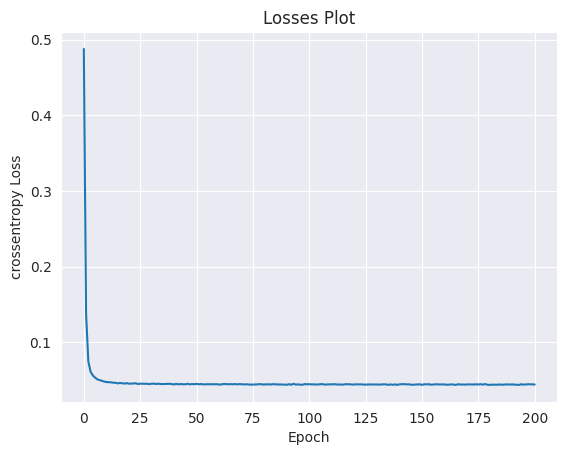

In [38]:
for dict_args in list_args:

    print(20*'=')
    print('MODEL\t'    + dict_args['model'])
    print('DATASET\t' + dict_args['dataset'])
    print(20*'=')
    
    pipeline_result = pipeline(
        dataset=dict_args['dataset'],
        dataset_kwargs = dict_args['dataset_kwargs'],
        evaluator=dict_args['evaluator'],
        evaluator_kwargs = dict_args['evaluator_kwargs'],
        loss = dict_args['loss'],
        model= dict_args['model'],
        model_kwargs = dict_args['model_kwargs'],    
        training_kwargs=dict_args['training_kwargs'],
        optimizer=dict_args['optimizer'],
        optimizer_kwargs=dict_args['optimizer_kwargs'],
        stopper='early',
        stopper_kwargs={'frequency':50, 'patience':2, 'relative_delta':0.002}
    )

    pipeline_result.plot_losses()

    hits_at_10 = pipeline_result.get_metric('hits_at_10')
    print(20*'-')
    print('RESULT\t' + str(hits_at_10))

    dir_save = './models/20240606/' + dict_args['dataset'] + '_' + dict_args['model']
    if not os.path.exists(dir_save):
        os.mkdir(dir_save)
    pipeline_result.save_to_directory(dir_save)